In [2]:
# Imports
from random import *
import pandas as pd
    
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.externals import joblib
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

import dateutil.parser as dateparser
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix

import itertools

from sklearn.utils import resample

from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

import time

from sklearn.base import clone as cloneClassifier

In [4]:
df = pd.read_csv('votos_deputados.csv',encoding='ansi')

In [5]:
###filter voters

322


In [6]:
##take a look

,Unnamed: 0_4930.0,Unnamed: 0_4931.0,Unnamed: 0_62881.0,Unnamed: 0_64960.0,Unnamed: 0_66828.0,Unnamed: 0_67312.0,Unnamed: 0_69871.0,Unnamed: 0_72912.0,Unnamed: 0_73424.0,Unnamed: 0_73434.0,...,8440_Sim,8440_null,8538_Abstenção,8538_Não,8538_Sim,8538_null,8541_Abstenção,8541_Não,8541_Sim,8541_null
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [7]:
def calculateAndApplyPCA(training_data, threshold=0.95, show=False):
    pca = PCA()
    pca.fit(training_data)
    training_data_pca = pca.transform(training_data)

    pca_analysis_data = list(map(lambda x : sum(pca.explained_variance_ratio_[0:x]), range(len(training_data_pca[1,:]))))
    
    optimal_dimensions = [ n for n,i in enumerate(pca_analysis_data) if i>threshold ][0]
    
    if show:
        fig, ax = plt.subplots()
        ax.plot(pca_analysis_data)
        ax.set_title('accumulated sum of information')
        plt.show()
    print(optimal_dimensions,'dimensions have a total accumulated information of',pca_analysis_data[optimal_dimensions])
    
    return [pca, training_data_pca, optimal_dimensions]

def scaleAllFeatures(training_data, ss=StandardScaler()):
    #ss = StandardScaler()

    # fit scaler on numeric_features
    ss.fit(training_data)

    # scale numeric features now
    training_data_scale = training_data.copy()
    training_data_scale = ss.transform(training_data_scale)
    
    return [ss, training_data_scale]

from sklearn.cluster import KMeans



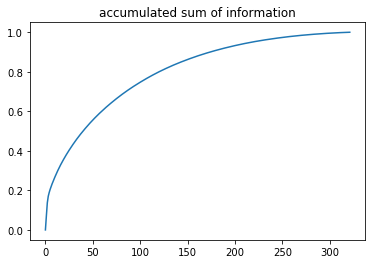

218 dimensions have a total accumulated information of 0.9502878459479628


In [8]:
###pca

In [10]:
#train and test a model

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

2  - Silhouette Coefficient: 0.058
3  - Silhouette Coefficient: 0.059
4  - Silhouette Coefficient: 0.039
5  - Silhouette Coefficient: 0.046
6  - Silhouette Coefficient: 0.032
7  - Silhouette Coefficient: 0.032
8  - Silhouette Coefficient: 0.029
9  - Silhouette Coefficient: 0.026
10  - Silhouette Coefficient: 0.022
11  - Silhouette Coefficient: 0.025
12  - Silhouette Coefficient: 0.023
13  - Silhouette Coefficient: 0.025
14  - Silhouette Coefficient: 0.024
15  - Silhouette Coefficient: 0.016
16  - Silhouette Coefficient: 0.020
17  - Silhouette Coefficient: 0.014
18  - Silhouette Coefficient: 0.015
19  - Silhouette Coefficient: 0.014
20  - Silhouette Coefficient: 0.023
21  - Silhouette Coefficient: 0.006
22  - Silhouette Coefficient: 0.007
23  - Silhouette Coefficient: 0.011
24  - Silhouette Coefficient: 0.010
25  - Silhouette Coefficient: 0.006
26  - Silhouette Coefficient: 0.023
27  - Silhouette Coefficient: -0.001
28  - Silhouette Coefficient: 0.008
29  - Silhouette Coefficient: 0.016

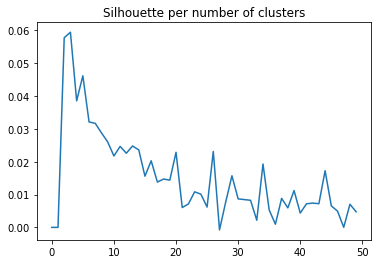

Best number of clusters: 3


In [11]:
###silhouette search

In [12]:

def plotCluster(X, y_pred):
    plt.figure(figsize=(12, 12))

    plt.subplot(421)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Dimensions: 0x1; Clusters: "+str(1+max(y_pred)))

    plt.subplot(422)
    plt.scatter(X[:, 0], X[:, 2], c=y_pred)
    plt.title("Dimensions: 0x2; Clusters: "+str(1+max(y_pred)))

    plt.subplot(423)
    plt.scatter(X[:, 0], X[:, 3], c=y_pred)
    plt.title("Dimensions: 0x3; Clusters: "+str(1+max(y_pred)))

    plt.subplot(424)
    plt.scatter(X[:, 0], X[:, 4], c=y_pred)
    plt.title("Dimensions: 0x4; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(425)
    plt.scatter(X[:, 0], X[:, 5], c=y_pred)
    plt.title("Dimensions: 0x5; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(426)
    plt.scatter(X[:, 0], X[:, 6], c=y_pred)
    plt.title("Dimensions: 0x6; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(427)
    plt.scatter(X[:, 0], X[:, 7], c=y_pred)
    plt.title("Dimensions: 0x7; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(428)
    plt.scatter(X[:, 0], X[:, 8], c=y_pred)
    plt.title("Dimensions: 0x8; Clusters: "+str(1+max(y_pred)))

    plt.show()

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, y_pred, sample_size=10000))

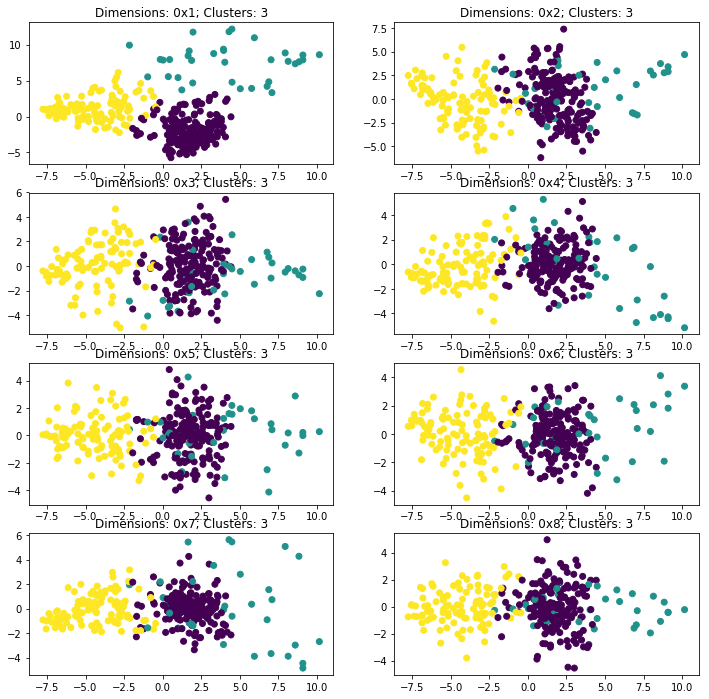

Silhouette Coefficient: 0.060


In [13]:
#train and plot proper clusters

In [14]:
#check results

,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
0,178957.0,Obstrução,null,Sim,Não,Sim,Sim,Sim,Não,Sim,...,null,null,Não,Sim,Não,Não,ABEL MESQUITA JR.,PDT,RR,0
2,178914.0,null,null,null,null,null,null,null,null,null,...,Sim,Não,Não,null,Sim,Não,ADALBERTO CAVALCANTI,PTB,PE,0
4,178968.0,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,...,Sim,Não,Não,null,Não,Não,ADELSON BARRETO,PTB,SE,0
5,133374.0,Não,null,Sim,Não,Não,Não,Não,Não,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,ADEMIR CAMILO,PROS,MG,0
6,178903.0,null,Não,Sim,Sim,Sim,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT,2
7,141372.0,null,null,Sim,Não,Sim,Sim,Sim,Sim,Sim,...,null,Não,Não,null,Sim,Não,AELTON FREITAS,PR,MG,0
9,136811.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,null,Não,null,Sim,Sim,Não,AFONSO HAMM,PP,RS,2
10,178835.0,Sim,Sim,null,Não,Sim,Sim,Sim,Não,Sim,...,null,null,null,Não,null,null,AFONSO MOTTA,PDT,RS,1
11,160527.0,Sim,Sim,Sim,null,Sim,Sim,Sim,Sim,Sim,...,null,Não,null,Sim,Sim,null,AGUINALDO RIBEIRO,PP,PB,0
12,178836.0,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,...,null,null,Não,Sim,Sim,Não,ALAN RICK,PRB,AC,0


In [17]:
#analyse

,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
6,178903.0,null,Não,Sim,Sim,Sim,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT,2
9,136811.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,null,Não,null,Sim,Sim,Não,AFONSO HAMM,PP,RS,2
14,73579.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,null,ALBERTO FRAGA,DEM,DF,2
15,160559.0,null,Sim,Sim,Não,Não,Não,Não,Não,Não,...,Sim,Não,Não,null,Sim,Não,ALCEU MOREIRA,PMDB,RS,2
18,178972.0,null,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Não,Sim,Não,ALEX MANENTE,PPS,SP,2
46,160602.0,Obstrução,Não,Sim,null,null,null,null,null,null,...,null,Não,Não,Sim,Sim,null,ARNALDO JORDY,PPS,PA,2
55,73655.0,Não,Sim,Sim,Sim,Não,Não,Não,Não,Não,...,Não,Sim,Não,Sim,Não,Não,AUGUSTO CARVALHO,Solidaried,DF,2
56,160665.0,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,null,AUGUSTO COUTINHO,Solidaried,PE,2
57,160512.0,null,null,null,Sim,Não,Não,Não,Não,Não,...,null,null,Não,Sim,Sim,null,AUREO,Solidaried,RJ,2
62,74535.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,null,Não,BENITO GAMA,PTB,BA,2
